In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [3]:
warnings.filterwarnings("ignore")

EXTRACTING DATASET

In [4]:
a=pd.read_csv("C:\\Users\\sowmy\\Downloads\\wine.csv")
df=pd.DataFrame(a)
print(df.shape)
df.head(10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.shape

(1599, 12)

In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

# EDA

# 1. CHECKING NULL VALUES

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='pink')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='vertical')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='yellow')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

NameError: name 'columns_with_missing_values' is not defined

# CHECKING DUPLICATES

In [9]:
df[df.duplicated()]
df.head().style.background_gradient(cmap="coolwarm")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [10]:
df=df.drop_duplicates()

# VISUALIZATION

In [39]:
import seaborn as sns
sns.pairplot(df,kind='hist',height=8.5,size=10)

# CORRELATION

In [40]:
corr=df.corr().style.background_gradient(cmap="rainbow_r")
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


DISPLAYING HEAT MAP

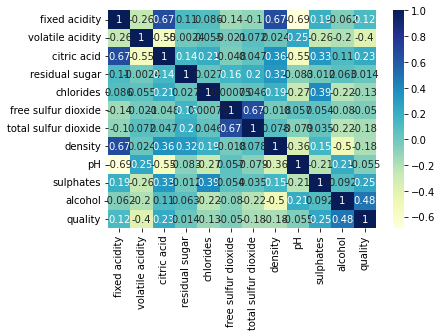

In [57]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

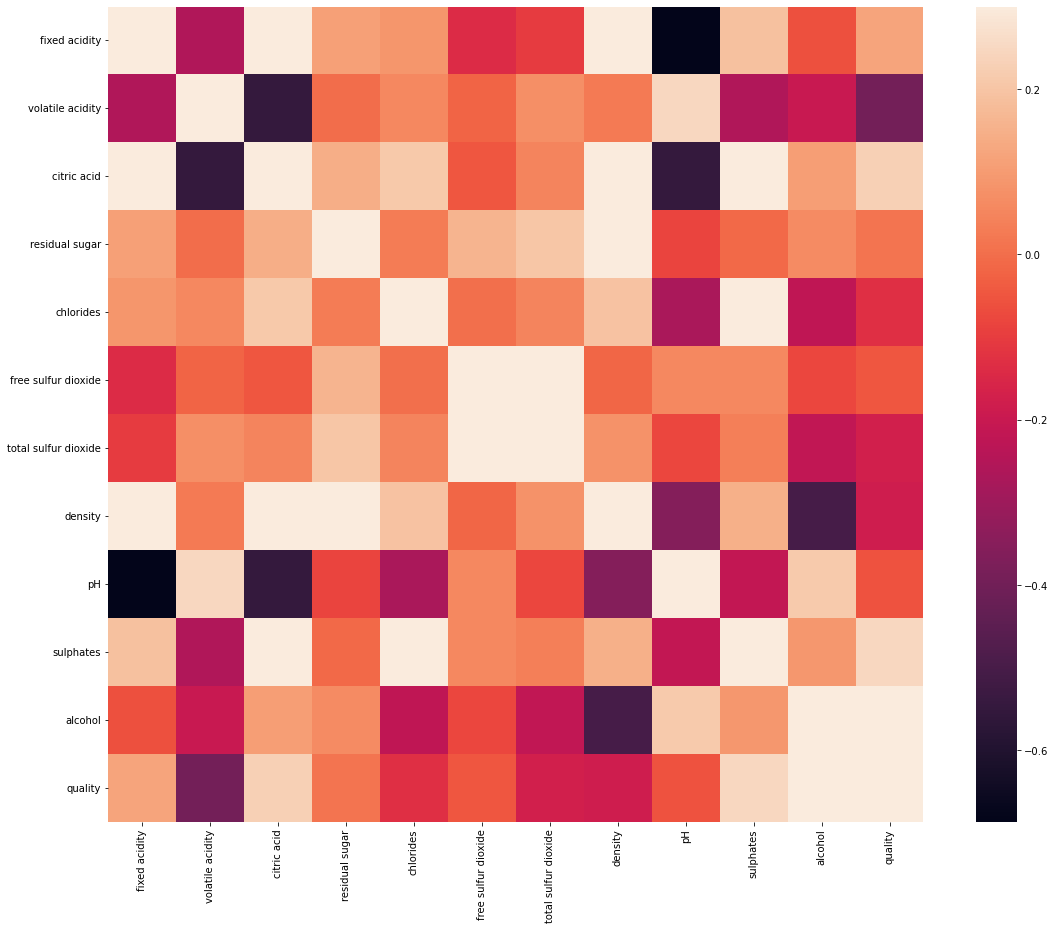

In [58]:
f, ax = plt.subplots(figsize=(19,15))
ax = sns.heatmap(df.corr(),vmax=.3, square=True)

change the values of quality column into 0s and 1s

In [59]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

DESCRIPTIVE STATS

In [60]:
df.describe().style.background_gradient(cmap="gist_heat")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


CHECKING OUTLIERS USING BOX PLOT

In [61]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

CHECKING OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x2a3194823a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a319482ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a319473fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a31948d220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a31948d5b0>],
 'means': []}

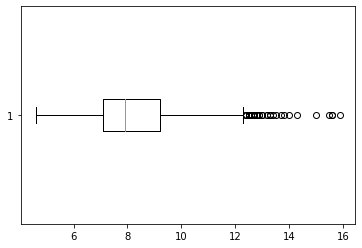

In [62]:
plt.boxplot(x=df["fixed acidity"],vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x2a291e56fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a291e68730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a291e56c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a291e68e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a291e74220>],
 'means': []}

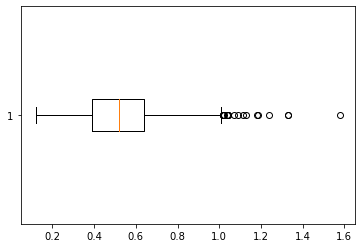

In [26]:
plt.boxplot(x=df["volatile acidity"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a291eccd30>,
 'caps': [<matplotlib.lines.Line2D at 0x2a291edd490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a291ecc9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a291eddbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a291eddf40>],
 'means': []}

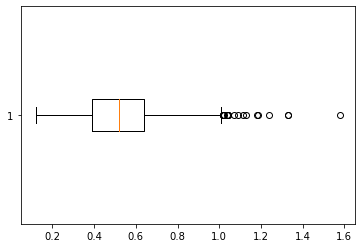

In [27]:
plt.boxplot(x=df["volatile acidity"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a291f46a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2a291f54190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a291f466a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a291f548b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a291f54c40>],
 'means': []}

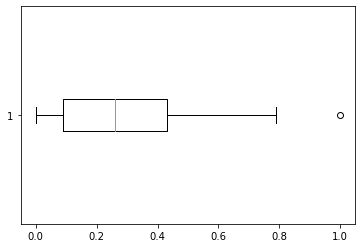

In [28]:
plt.boxplot(x=df["citric acid"],vert=False)

dtype('float64')

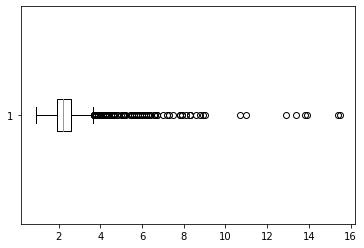

In [87]:
plt.boxplot(x=df["residual sugar"],vert=False)
df["residual sugar"].dtypes

There are so many outliers in the data set so lets try without reducing outliers


In [109]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

BUILDING A MODEL

In [110]:
df = df.astype({"quality": float}) 
df.loc[df['quality'] <6.5, 'quality'] = '0'

In [111]:
df = df.astype({"quality": float}) 
df.loc[df['quality'] >6.5, 'quality'] = '1'
df["quality"].value_counts()

0.0    1175
1       184
Name: quality, dtype: int64

# RF CLASSIFIER

In [112]:
set(df)

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [113]:
x=df.drop(columns=['quality'])
set(x)

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [120]:
# df = df.astype({"quality": int}) 
y=df.quality
set(y)

{0, 1}

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)

In [122]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                                min_samples_split = 10, min_samples_leaf = 9, max_features = "auto",
                                random_state = 500, max_depth = 12) 

In [123]:
rf_fit=rf.fit(x_train,y_train)

In [124]:
y_pred=rf_fit.predict(x_test)

In [125]:
accuracy_score(y_test,y_pred)

0.9117647058823529

# USING PCA

In [153]:
pca=PCA(n_components=4)

pca.fit(x_train)

PCA(n_components=4)

In [128]:
x_train_transformed=pca.transform(x_train)
x_test_transformed=pca.transform(x_test)

In [129]:
print(x_test_transformed.shape)

(272, 4)


In [130]:
print(x_train_transformed.shape)

(1087, 4)


In [131]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [132]:
y_pred=rf.predict(x_test)

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [134]:
accuracy_score(y_test,y_pred)

0.9191176470588235

By using the Principle compound Analysis the accuracy rate was slightly increased from 91% to 92%.
In this i have reduced the feauture from 11 to 5 features

GRID SEARCH CV

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


In [136]:
n_estimators = [300]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [15]
# Minimum number of samples required to split a node
min_samples_split = [10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [9]
# # Method of selecting samples for training each tree
bootstrap = [True, False]
# # method of choosing the impurity type
criterion =['entropy']


In [145]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }
print(param_grid)

{'n_estimators': [300], 'max_features': ['auto'], 'max_depth': [15], 'min_samples_split': [10], 'min_samples_leaf': [9]}


In [146]:
rfc=RandomForestClassifier(random_state = 200)

In [147]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=2, n_jobs = 4)

In [148]:
rf_Grid=rf_Grid.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [149]:
rf_Grid.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 300}

In [150]:
y_pred_2 = rf_Grid.predict(x_test)

In [152]:
accuracy_score(y_test,y_pred_2)

0.8921568627450981